In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

**Parte 1 analisi statistica**

Utilizziamo la tabella integrate_titles che abbiamo prodotto durante il primo laboratorio. Vi ricordo che abbiamo effettuato integrazione di due dataset provenienti da Disney+ e Netflix, contenenti informazioni circa film e serie tv rilasciate sulle due piattaforme di streaming. 
Il dataset integrato è stato pulito e risulta quindi pronto per ulteriori analisi. 

1. Importiamo il dataset:

In [3]:
#codice qui 
integrate_titles = pd.read_csv("integrate_titles2.csv")

visualizziamo il dataset

In [4]:
#codice qui 
# describe() fornisce già dati statistici sulla nostra tabella
integrate_titles.describe()

,Unnamed: 0.1,Unnamed: 0,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,year,month,day
count,4715.00000,4715.000000,4715.000000,4715.000000,1716.000000,4170.000000,4.165000e+03,4679.000000,4556.000000,4714.000000,4714.000000,4714.000000
mean,2357.00000,1529.820785,2013.043690,72.210180,2.310606,6.595947,2.858029e+04,16.913780,6.737944,2019.381417,7.253712,13.925541
std,1361.24759,1081.029324,14.280027,39.543569,2.616994,1.114757,9.992332e+04,41.354817,1.150725,1.403537,3.346734,8.733857
min,0.00000,0.000000,1928.000000,0.000000,1.000000,1.500000,5.000000e+00,0.600000,0.500000,2009.000000,1.000000,1.000000
25%,1178.50000,589.000000,2014.000000,41.000000,1.000000,5.900000,6.580000e+02,3.526000,6.100000,2019.000000,4.000000,7.000000
50%,2357.00000,1287.000000,2018.000000,74.000000,1.000000,6.700000,2.946000e+03,7.896000,6.800000,2020.000000,7.000000,12.000000
75%,3535.50000,2465.500000,2020.000000,101.000000,3.000000,7.400000,1.331600e+04,15.895500,7.454000,2020.000000,11.000000,21.000000
max,4714.00000,3644.000000,2022.000000,225.000000,44.000000,9.600000,1.934821e+06,1049.200000,10.000000,2021.000000,12.000000,31.000000


In [5]:
#codice qui per vedere numero di elementi e informazioni sulle colonne
print(integrate_titles.shape)
integrate_titles.info()

(4715, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4715 entries, 0 to 4714
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          4715 non-null   int64  
 1   Unnamed: 0            4715 non-null   int64  
 2   id                    4715 non-null   object 
 3   title                 4715 non-null   object 
 4   type                  4715 non-null   object 
 5   release_year          4715 non-null   int64  
 6   age_certification     2857 non-null   object 
 7   runtime               4715 non-null   int64  
 8   genres                4715 non-null   object 
 9   production_countries  4715 non-null   object 
 10  seasons               1716 non-null   float64
 11  imdb_id               4224 non-null   object 
 12  imdb_score            4170 non-null   float64
 13  imdb_votes            4165 non-null   float64
 14  tmdb_popularity       4679 non-null   float64
 15  tmdb_score

**Parte 1. Statistiche di base e analisi OLAP**

Calcoliamo alcune statistiche di base, sulle colonne imdb_score e tmdb_score:
1. Media;
2. Deviazione standard;
3. Varianza;
4. Moda;
5. Mediana.

prima di tutto verifichiamo che non ci siano valori nulli

In [6]:
#codice qui 
print(integrate_titles["imdb_score"].isnull().sum())
print(integrate_titles["tmdb_score"].isnull().sum())

545
159


proviamo a riempire questi valori nulli con il valore medio degli elementi non nulli. Iniziamo con imdb

In [7]:
#calcolo media non nulli
print(integrate_titles['imdb_score'].mean())
#trovo indici nulli di ibmdb_score
index_null = integrate_titles["imdb_score"].isnull()
#trovo indici non nulli di ibmdb_score
index_non_null = integrate_titles["imdb_score"].notnull()
#calcolo media non nulli di ibmdb_score
mean_non_null = integrate_titles['imdb_score'][index_non_null].mean()
#sostituzione con loc su indici nulli 
integrate_titles.loc[index_null, 'imdb_score'] = mean_non_null # permette di non modificare la media

6.595947242206234


stessa cosa per tmdb

In [8]:
#codice qui 
#calcolo media non nulli
print(integrate_titles['tmdb_score'].mean())
index_null = integrate_titles["tmdb_score"].isnull()
index_non_null = integrate_titles["tmdb_score"].notnull()
mean_non_null = integrate_titles['tmdb_score'][index_non_null].mean()
#sostituzione
integrate_titles.loc[index_null, 'tmdb_score'] = mean_non_null

6.73794446883231


calcoliamo quindi le statistiche richieste

In [9]:
#codice qui 
print("IMDB")
print("Media:\n", integrate_titles['imdb_score'].mean())
print("Moda:\n", integrate_titles['imdb_score'].mode()[0])
print("Deviazione std:\n", integrate_titles['imdb_score'].std())
print("Varianza:\n", integrate_titles['imdb_score'].var()) # quadrato di std
print("Mediana:\n", integrate_titles['imdb_score'].median())
print("\n")
print("TMDB")
print("Media:\n", integrate_titles['tmdb_score'].mean())
print("Moda:\n", integrate_titles['tmdb_score'].mode()[0])
print("Deviazione std:\n", integrate_titles['tmdb_score'].std())
print("Varianza:\n", integrate_titles['tmdb_score'].var()) # quadrato di std
print("Mediana:\n", integrate_titles['tmdb_score'].median())

IMDB
Media:
 6.595947242206234
Moda:
 6.595947242206234
Deviazione std:
 1.0483376246330742
Varianza:
 1.0990117752213164
Mediana:
 6.595947242206234


TMDB
Media:
 6.73794446883231
Moda:
 7.0
Deviazione std:
 1.1311522709645765
Varianza:
 1.279505460108319
Mediana:
 6.8


stampiamo i valori di num_awards per verificare che moda e mediana siano calcolate nel modo corretto. Sortiamo l'array in ordine crescente per visualizzare la mediana.

In [10]:
sorted = np.sort(integrate_titles['imdb_score']) 
print(sorted.tolist())
size = len(sorted.tolist())
print("Mediana:", sorted.tolist()[size//2])

[1.5, 1.6, 1.7, 2.3, 2.3, 2.3, 2.4, 2.4, 2.5, 2.6, 2.6, 2.6, 2.7, 2.7, 2.7, 2.8, 2.8, 2.8, 2.8, 2.9, 2.9, 2.9, 2.9, 3.0, 3.0, 3.0, 3.1, 3.1, 3.1, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.4, 3.4, 3.5, 3.5, 3.5, 3.5, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6,

ora facciamo la stessa cosa, ma senza riempire i valori nulli.
Le funzioni che calcolano le statistiche in pandas, hanno un'opzione dropna=True di default, quindi non considerano i valori nulli, in automatico.  

In [11]:
integrate_titles = pd.read_csv("integrate_titles2.csv") 

In [12]:
#codice qui 
print("IMDB")
print("Media:\n", integrate_titles['imdb_score'].mean())
print("Moda:\n", integrate_titles['imdb_score'].mode()[0])
print("Deviazione std:\n", integrate_titles['imdb_score'].std())
print("Varianza:\n", integrate_titles['imdb_score'].var()) # quadrato di std
print("Mediana:\n", integrate_titles['imdb_score'].median())
print("\n")
print("TMDB")
print("Media:\n", integrate_titles['tmdb_score'].mean())
print("Moda:\n", integrate_titles['tmdb_score'].mode()[0])
print("Deviazione std:\n", integrate_titles['tmdb_score'].std())
print("Varianza:\n", integrate_titles['tmdb_score'].var()) # quadrato di std
print("Mediana:\n", integrate_titles['tmdb_score'].median())

# Noteremo che, non avendo l'influenza della mediana sostituita ai valori nulli, moda e mediana cambiano leggermente valore

IMDB
Media:
 6.595947242206234
Moda:
 6.6
Deviazione std:
 1.1147565025873383
Varianza:
 1.2426820600607544
Mediana:
 6.7


TMDB
Media:
 6.73794446883231
Moda:
 7.0
Deviazione std:
 1.1507253226361223
Varianza:
 1.3241687681560077
Mediana:
 6.8


come dimostrazione, eliminiamo le righe che contengono un valore nullo su imdb_score e ripetiamo le statistiche 

In [13]:
integrate_titles = pd.read_csv("integrate_titles2.csv") 
integrate_titles = integrate_titles.dropna(axis=0, subset=['imdb_score'])
integrate_titles = integrate_titles.dropna(axis=0, subset=['tmdb_score'])

In [14]:
#codice qui 
print("IMDB")
print("Media:\n", integrate_titles['imdb_score'].mean())
print("Moda:\n", integrate_titles['imdb_score'].mode()[0])
print("Deviazione std:\n", integrate_titles['imdb_score'].std())
print("Varianza:\n", integrate_titles['imdb_score'].var()) # quadrato di std
print("Mediana:\n", integrate_titles['imdb_score'].median())
print("\n")
print("TMDB")
print("Media:\n", integrate_titles['tmdb_score'].mean())
print("Moda:\n", integrate_titles['tmdb_score'].mode()[0])
print("Deviazione std:\n", integrate_titles['tmdb_score'].std())
print("Varianza:\n", integrate_titles['tmdb_score'].var()) # quadrato di std
print("Mediana:\n", integrate_titles['tmdb_score'].median())

IMDB
Media:
 6.598869223205506
Moda:
 6.6
Deviazione std:
 1.1061238215665623
Varianza:
 1.2235099086370163
Mediana:
 6.7


TMDB
Media:
 6.750692723697148
Moda:
 7.0
Deviazione std:
 1.128093304230668
Varianza:
 1.2725945030500667
Mediana:
 6.8085


A questo punto, usiamo quest'ultima versione  e predisponiamo il nostro dataset per un'analisi OLAP. Per prima cosa, quantizziamo lo score di IMBD. Possiamo usare questa quantizzazione:
1. BAD = [0,4.9];
2. SUFFICIENT = [5,5.9];
3. GOOD = [6,6.9];
4. VERY GOOD = [7,7.9];
5. EXCELLENT = [8,10].

**tip** 

Dobbiamo utilizzare la funzione between di pandas (between(min_range,max_range,'both'), la funzione loc per accedere ai valori del dataframe e creare una nuova colonna che chiamiamo 'imdb_score_quant


In [15]:
#codice qui 
integrate_titles.loc[integrate_titles['imdb_score'].between(0, 4.9, 'both'), 'imdb_score_quant'] = 'LOW'
integrate_titles.loc[integrate_titles['imdb_score'].between(5, 5.9, 'both'), 'imdb_score_quant'] = 'SUFFICIENT'
integrate_titles.loc[integrate_titles['imdb_score'].between(6, 6.9, 'both'), 'imdb_score_quant'] = 'GOOD'
integrate_titles.loc[integrate_titles['imdb_score'].between(7, 7.9, 'both'), 'imdb_score_quant'] = 'VERY GOOD'
integrate_titles.loc[integrate_titles['imdb_score'].between(8, 10, 'both'), 'imdb_score_quant'] = 'EXCELLENT'
quantize_imdb_score = ['LOW','SUFFICIENT','GOOD','VERY GOOD','EXCELLENT']

visualizziamo la colonna che abbiamo aggiunto 

In [16]:
#codice qui 
print(integrate_titles['imdb_score_quant'].tolist())

['EXCELLENT', 'VERY GOOD', 'VERY GOOD', 'EXCELLENT', 'EXCELLENT', 'VERY GOOD', 'VERY GOOD', 'EXCELLENT', 'LOW', 'GOOD', 'GOOD', 'EXCELLENT', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'SUFFICIENT', 'GOOD', 'VERY GOOD', 'SUFFICIENT', 'EXCELLENT', 'GOOD', 'VERY GOOD', 'SUFFICIENT', 'GOOD', 'VERY GOOD', 'GOOD', 'GOOD', 'SUFFICIENT', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'SUFFICIENT', 'GOOD', 'EXCELLENT', 'GOOD', 'VERY GOOD', 'VERY GOOD', 'VERY GOOD', 'GOOD', 'VERY GOOD', 'VERY GOOD', 'VERY GOOD', 'VERY GOOD', 'GOOD', 'LOW', 'GOOD', 'SUFFICIENT', 'GOOD', 'GOOD', 'SUFFICIENT', 'GOOD', 'SUFFICIENT', 'GOOD', 'VERY GOOD', 'GOOD', 'SUFFICIENT', 'GOOD', 'VERY GOOD', 'VERY GOOD', 'EXCELLENT', 'EXCELLENT', 'GOOD', 'VERY GOOD', 'GOOD', 'VERY GOOD', 'GOOD', 'GOOD', 'VERY GOOD', 'GOOD', 'VERY GOOD', 'VERY GOOD', 'VERY GOOD', 'VERY GOOD', 'VERY GOOD', 'GOOD', 'SUFFICIENT', 'VERY GOOD', 'VERY GOOD', 'EXCELLENT', 'GOOD', 'EXCELLENT', 'EXCELLENT', 'VERY GOOD', 'GOOD', 'SUFFICIENT', 'GOOD', 'SUFFICIENT', 'GOOD', 'VERY GOO

Facciamo la stessa cosa per gli anni di uscita (release_year). Usiamo questa quantizzazione:

1. VERY OLD = [1900,1980];
3. OLD = [1981,2000].
4. RECENT = [2001,2015];
5. VERY RECENT = [2016,2023].



In [17]:
#CODICE QUI
integrate_titles.loc[integrate_titles['release_year'].between(1900, 1980, 'both'), 'release_year_quant'] = 'VERY OLD'
integrate_titles.loc[integrate_titles['release_year'].between(1981, 2000, 'both'), 'release_year_quant'] = 'OLD'
integrate_titles.loc[integrate_titles['release_year'].between(2001, 2015, 'both'), 'release_year_quant'] = 'RECENT'
integrate_titles.loc[integrate_titles['release_year'].between(2016, 2023, 'both'), 'release_year_quant'] = 'VERY RECENT'
quantize_release_year = ['VERY OLD','OLD','RECENT','VERY RECENT']

visualizziamo anche questa colonna

In [18]:
#codice qui 
print(integrate_titles['release_year_quant'].tolist())

['VERY OLD', 'VERY OLD', 'VERY OLD', 'VERY OLD', 'VERY OLD', 'VERY OLD', 'VERY OLD', 'VERY OLD', 'VERY OLD', 'VERY OLD', 'VERY OLD', 'VERY OLD', 'VERY OLD', 'VERY OLD', 'VERY OLD', 'VERY OLD', 'VERY OLD', 'VERY OLD', 'VERY OLD', 'VERY OLD', 'VERY OLD', 'VERY RECENT', 'VERY OLD', 'VERY OLD', 'VERY OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'VERY RECENT', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'RECENT', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'RECENT', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'VERY RECENT', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'VERY RECENT', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'RECENT', 'RECENT', 'RECENT', 'RECENT', 'RE

Infine, utilizziamo TYPE che risulta già quantizzato.

In [19]:
integrate_titles['type'].isnull().sum()

0

visualizziamo i possibili valori di type

**tip** usiamo la funzione unique di numpy 

In [20]:
#codice qui 
print(integrate_titles['type'].unique()) # unique di pandas
#print(np.unique(integrate_titles['type']))

['MOVIE' 'SHOW']


In [21]:
quantize_type = ['MOVIE', 'SHOW']

come vediamo sono soltanto MOVIE and SHOW.

il programma a cui sono iscritti gli studenti è già discreto e quantizzato. Visualizziamo allora le colonne aggiunte

**Parte 2. Visualizzazione dei dati e OLAP**

Abbiamo visto che esistono diverse modalita' di visualizzazione dei dati. 

In base al tipo di dato, alcune sono appropriate, altre possono non esserlo. 

La visualizzazione dei dati dipende da cosa vogliamo **comunicare**
con i dati. 

Proviamo a visualizzare il dato in forma quantizzata per OLAP, poi faremo alcune visualizzazioni. Dobbiamo prima di tutto contare il numero di occorrenze di ciascun valore. Sarà sufficiente usare la funzione value_counts di pandas. 
Ricordiamo che abbiamo:
- 5 valori possibili per Score;
- 4 valori possibili per release_year;
- 2 valori possibili per type

In [22]:
#codice qui 
OLAP = np.zeros((5,4,2))

for z in range(0,len(quantize_type)):
  #codice qui 
  titles_type = integrate_titles[integrate_titles['type'] == quantize_type[z]]
  for j in range(0,len(quantize_release_year)):
    for i in range(0,len(quantize_imdb_score)):
      #codice qui 
      OLAP[i,j,z] = np.sum((titles_type['release_year_quant'] == quantize_release_year[j]) & (titles_type['imdb_score_quant'] == quantize_imdb_score[i])) 

Per prima cosa, facciamo uno **slicing** rispetto a type

In [23]:
#codice qui 
print('MOVIE')
OLAP[:,:,0]

MOVIE


array([[  2.,  18.,  39., 179.],
       [ 19.,  41., 121., 430.],
       [ 45.,  82., 165., 668.],
       [ 38.,  41., 149., 388.],
       [  6.,   7.,  46.,  41.]])

visualizziamo ora questa matrice, con una heatmap. Dobbiamo usare matplotlib e la funzione imshow.

Text(0, 0.5, 'SCORE')

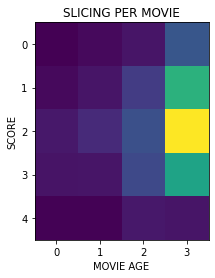

In [24]:
#codice qui 
plt.figure()
plt.imshow(OLAP[:,:,0])
plt.title('SLICING PER MOVIE')
plt.xlabel('MOVIE AGE')
plt.ylabel('SCORE')

In [25]:
print('SHOW')
#codice qui 
OLAP[:,:,1]

SHOW


array([[  0.,   0.,   8.,  42.],
       [  1.,   2.,  29., 119.],
       [  0.,  16.,  46., 368.],
       [  0.,  20.,  89., 493.],
       [  4.,  12.,  92., 202.]])

stessa cosa per show

Text(0, 0.5, 'SCORE')

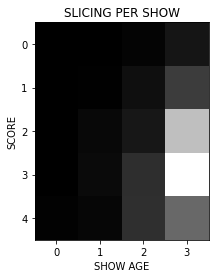

In [26]:
#codice qui 
plt.figure()
plt.imshow(OLAP[:,:,1], cmap="gray")
plt.title('SLICING PER SHOW')
plt.xlabel('SHOW AGE')
plt.ylabel('SCORE')

Notiamo (tra le altre cose), con questo slicing, che la maggior parte delle serie sono molto recenti, e che molte di esse sono valutate come very good. Mentre la maggior parte dei film molto recenti sono valutati good. 

adesso facciamo slicing rispetto al release_year, visualizzando soltanto i VERY OLD. 


In [27]:
print('VERY OLD')
#codice qui 
slice_very_old = OLAP[:,0,:]

VERY OLD


possiamo notare come con questa visualizzazione, sia evidente che non il numero di show sia molto piccolo rispetto ai film, la cui valutazione è per lo più media. 

proviamo a visualizzare questa informazione con un grafico a linea. 

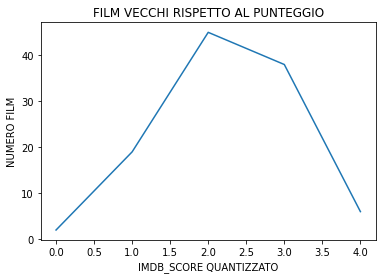

In [28]:
#codice qui 
plt.figure()
plt.title('FILM VECCHI RISPETTO AL PUNTEGGIO')
plt.xlabel('IMDB_SCORE QUANTIZZATO')
plt.ylabel('NUMERO FILM')
plt.plot(slice_very_old[:,0])

a questo punto facciamo un dicing, visualizzando i film che hanno avuto una votazione "GOOD" e che siano "VERY RECENT".



In [29]:
print("GOOD and VERY RECENT")
#codice qui
OLAP[2,3,:]

GOOD and VERY RECENT


array([668., 368.])

visualizziamo questa informazione con un bar plot

<BarContainer object of 2 artists>

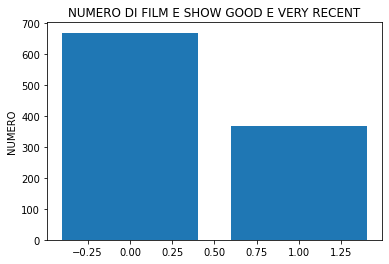

In [30]:
#codice qui 
plt.title('NUMERO DI FILM E SHOW GOOD E VERY RECENT')
plt.ylabel('NUMERO')
plt.bar(range(2),OLAP[2,3,:])

notiamo che ci sono più film che show.

A questo punto, vogliamo trovare un modo per visualizzare il numero di contenuti usciti nei vari anni, allo scopo di capire nuovamente se ci siano dei trend. Come possiamo fare?

In [31]:
#codice qui 
# value counts ordina automaticamente dal valore più alto al più basso
num_awards = integrate_titles['release_year'].value_counts(sort=True, normalize=True)

<AxesSubplot:>

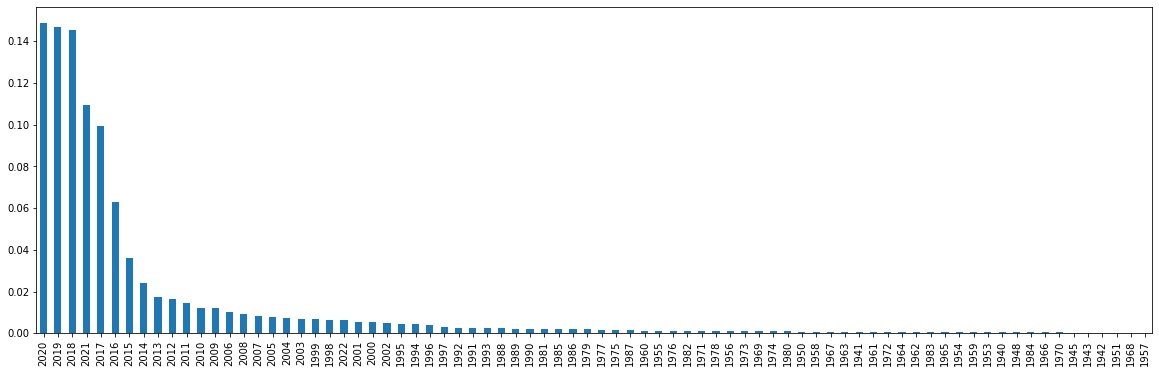

In [32]:
#codice qui 
fig = plt.figure(figsize=(20,6))
num_awards.plot(kind='bar')

Di fatto, vorremo un istogramma (o un diagramma a barre?) Esistono altri due metodi per fare questo plot. 

Ne vediamo uno insieme.

<BarContainer object of 10 artists>

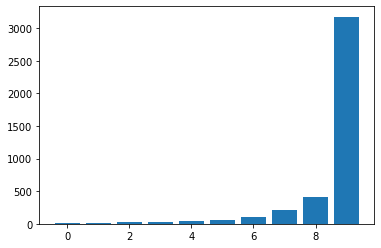

In [33]:
histo = np.histogram(integrate_titles['release_year'],bins=10)
plt.bar(x=np.asarray(range(10)),height=histo[0])

L'altro consiste nell'usare la funzione 'hist' della libreria matplotlib. Provate a farlo!

(array([  10.,   17.,   23.,   23.,   42.,   59.,  105.,  207.,  408.,
        3174.]),
 array([1940. , 1948.2, 1956.4, 1964.6, 1972.8, 1981. , 1989.2, 1997.4,
        2005.6, 2013.8, 2022. ]),
 <BarContainer object of 10 artists>)

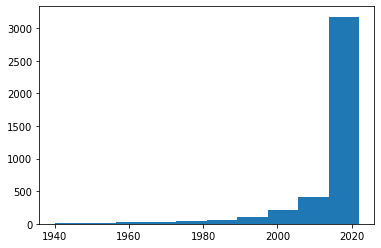

In [34]:
#codice qui 
plt.figure()
plt.hist(integrate_titles['release_year'], bins=10)

Esiste un modo alternativo di visualizzare questa informazione fornendo più dettagli? 

Usate i box plot

funzione pandas boxplot (argomenti: column = 'colonna da visualizzare', by ='colonna rispetto a cui dividere')

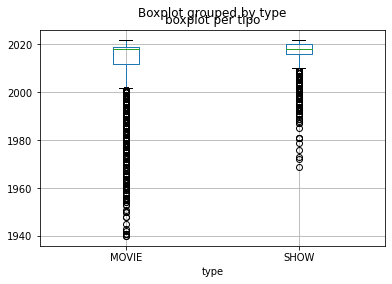

Text(0.5, 1.0, 'boxplot per tipo (orizzontali)')

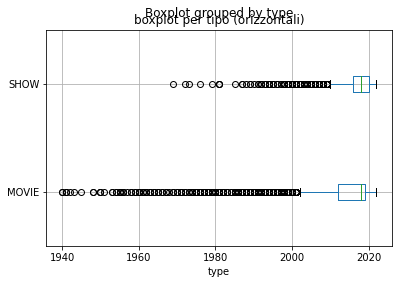

In [74]:
#codice qui
integrate_titles.boxplot(column='release_year', by='type')
plt.title('boxplot per tipo')
integrate_titles.boxplot(column='release_year', by='type', vert=False)
plt.title('boxplot per tipo (orizzontali)')


I box plot ci danno informazioni sulla distribuzione, non solo sulla media. 

Infine, facciamo un esempio di roll-up e dripping-down.
Utilizziamo la colonna date_added, che abbiamo sistemato durante il primo laboratorio. 

In [ ]:
integrate_titles.head()

come roll-up, visualizziamo con diagramma a barre, il numero di film usciti nei vari mesi, indipendentemente dagli anni

[228. 216. 284. 355. 291. 333. 368. 314. 363. 328. 699. 288.]


<BarContainer object of 12 artists>

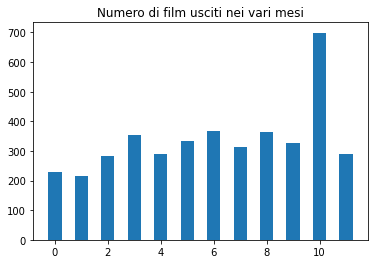

In [69]:
num_film = np.zeros((12))

#codice qui 
for i in range(0,12):
  num_film[i] = np.sum(integrate_titles['month'] == float(i+1)) # fisso il mese indipendentemente dagli anni

print(num_film)
plt.title('Numero di film usciti nei vari mesi')
plt.bar(range(12),num_film, width=0.5) # parte da zero (gennaio) fino a 11 (dicembre)

come esempio di dripping down, selezioniamo l'anno 2020, e visualizziamo la stessa informazione di prima (numero di film usciti per mese)

[ 78.  56.  59. 112.  83.  90. 103.  79. 114. 119.  93. 107.]


<BarContainer object of 12 artists>

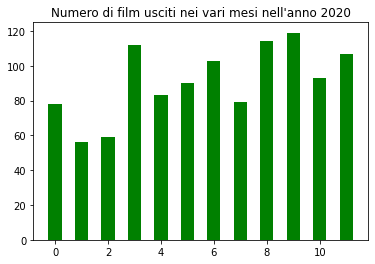

In [70]:
num_film_anno2020 = np.zeros((12))

#codice qui 
for i in range(0,12):
  num_film_anno2020[i] = np.sum((integrate_titles['year'] == 2020) & (integrate_titles['month'] == float(i+1))) # fisso il mese indipendentemente dagli anni

print(num_film_anno2020)
plt.title("Numero di film usciti nei vari mesi nell'anno 2020")
plt.bar(range(12),num_film_anno2020, width=0.5, color='green') # parte da zero (gennaio) fino a undici (dicembre)